In [160]:
import xlrd

folders = ["06-07", "07-08", "08-09", "09-10", "10-11", "11-12", "12-13", \
           "13-14", "14-15", "15-16", "16-17", "17-18", "18-19", "19-20"]
files = ["2006_2007", "2007_2008", "2008_2009", "2009_2010", "2010_2011", \
         "2011_2012", "2012_2013", "2013_2014", "2014_2015", "2015_2016", \
         "2016_2017", "2017_2018", "2018_2019", "2019_2020"]
quarters = ["Q1", "Q2", "Q3", "Q4"]


In [161]:
def getData(filename):
    workbook = xlrd.open_workbook(filename)
    worksheet = workbook.sheet_by_index(0)

    data = []
    start_row = 6

    for i in range(start_row, worksheet.nrows):
        school_name = worksheet.cell(i, 1).value
        school_state = worksheet.cell(i, 2).value
        school_type = worksheet.cell(i, 4).value
        school_sub = [worksheet.cell(i, 5).value, worksheet.cell(i, 6).value, worksheet.cell(i, 7).value,\
                      worksheet.cell(i, 8).value, worksheet.cell(i, 9).value]
        school_unsub = [worksheet.cell(i, 10).value, worksheet.cell(i, 11).value,\
                        worksheet.cell(i, 12).value, worksheet.cell(i, 13).value,\
                        worksheet.cell(i, 14).value]
        school_plus = [worksheet.cell(i, 20).value, worksheet.cell(i, 21).value,\
                       worksheet.cell(i, 22).value, worksheet.cell(i, 23).value,\
                       worksheet.cell(i, 24).value]

        row = {}
        row['state'] = school_state
        row['type'] = school_type
        row['sub'] = school_sub
        row['unsub'] = school_unsub
        row['plus'] = school_plus
        data.append(row)
    return data


In [162]:
average_loan_per_person = {}  # this is the average for that year and quarter, [year][quarter]
average_loan_school_type = {} # this is the average loan for that school type, [year][quarter][type]
average_loan_state = {}       # this is the average loan for that each state , [year][quarter][state]

In [163]:
def getMetrics(data, year, quarter):
    # indexed off school type ('Public, private') and state the school is in ("TN")
    # total gives running total, other gives count
    school_type_total = {}
    school_type_count = {}
    state_total = {}
    state_count = {}
    
    total_dollar_disbursed = 0
    sub_dollar_disbursed = 0
    unsub_dollar_disbursed = 0
    plus_dollar_disbursed = 0

    total_num_disbursed = 0
    sub_num_disbursed = 0
    unsub_num_disbursed = 0
    plus_num_disbursed = 0


    for row in data:
        school_type = row['type'].upper()
        school_state = row['state'].upper()
        
        # init keys here since we do += below
        if school_type not in school_type_total:
            school_type_total[school_type] = 0
        if school_type not in school_type_count:
            school_type_count[school_type] = 0
        if school_state not in state_total:
            state_total[school_state] = 0
        if school_state not in state_count:
            state_count[school_state] = 0

        if row['sub'][4] != '-' and row['sub'][4] != ' -':            
            total_dollar_disbursed += row['sub'][4]
            sub_dollar_disbursed += row['sub'][4]
            total_num_disbursed += row['sub'][3]
            sub_num_disbursed += row['sub'][3]
            
            school_type_total[school_type] += row['sub'][4]
            school_type_count[school_type] += row['sub'][3]
            state_total[school_state] += row['sub'][4]
            state_count[school_state] += row['sub'][3]

        if row['unsub'][4] != '-' and row['unsub'][4] != ' -':
            total_dollar_disbursed += row['unsub'][4]
            unsub_dollar_disbursed += row['unsub'][4]
            total_num_disbursed += row['unsub'][3]
            unsub_num_disbursed += row['unsub'][3]
            
            school_type_total[school_type] += row['unsub'][4]
            school_type_count[school_type] += row['unsub'][3]
            state_total[school_state] += row['unsub'][4]
            state_count[school_state] += row['unsub'][3]

        if row['plus'][4] != '-' and row['plus'][4] != ' -':
            total_dollar_disbursed += row['plus'][4]
            plus_dollar_disbursed += row['plus'][4]
            total_num_disbursed += row['plus'][3]
            plus_num_disbursed += row['plus'][3]
            
            school_type_total[school_type] += row['plus'][4]
            school_type_count[school_type] += row['plus'][3]
            state_total[school_state] += row['plus'][4]
            state_count[school_state] += row['plus'][3]
            
    # init dictionaries here since they might not exist when dereferencing them below
    if year not in average_loan_per_person:
        average_loan_per_person[year] = {}
    if year not in average_loan_school_type:
        average_loan_school_type[year] = {}
    if year not in average_loan_state:
        average_loan_state[year] = {}

    if quarter not in average_loan_per_person[year]:
        average_loan_per_person[year][quarter] = {}
    if quarter not in average_loan_school_type[year]:
        average_loan_school_type[year][quarter] = {}
    if quarter not in average_loan_state[year]:
        average_loan_state[year][quarter] = {}

        
    if total_num_disbursed == 0:
        average_loan_per_person[year][quarter] = 0;
    else:
        average_loan_per_person[year][quarter] = total_dollar_disbursed/total_num_disbursed
    
    for key in school_type_total.keys():
        if key not in average_loan_school_type[year][quarter]:
            average_loan_school_type[year][quarter][key] = {}
        
        # handle division by 0
        if school_type_count[key] == 0:
            average_loan_school_type[year][quarter][key] = 0
        else:
            average_loan_school_type[year][quarter][key] = school_type_total[key]/school_type_count[key]
    for key in state_total.keys():
        if key not in average_loan_state[year][quarter]:
            average_loan_state[year][quarter][key] = {}
            
        # handle division by 0
        if state_count[key] == 0:
            average_loan_state[year][quarter][key] = 0
        else:
            average_loan_state[year][quarter][key] = state_total[key]/state_count[key]


In [164]:
for i in range(len(folders)):
    for quarter in quarters:
        filename = '../data/06-20/' + folders[i] + '/DL_Dashboard_AY' + files[i] + '_' + quarter + '.xls'
        data = getData(filename)
        getMetrics(data, files[i], quarter)

In [165]:
# convert data into an easy-to-graph representation
average_loan_per_person_array = {}  # year_quarter: average loan amount
average_loan_school_type_array = {} # school type: year_quarter: average loan amount
average_loan_state_array = {} # state: year_quarter: average loan amount

for year in average_loan_per_person:
    for quarter in average_loan_per_person[year]:
        x = year+'_'+quarter
        average_loan_per_person_array[x] = average_loan_per_person[year][quarter]
        
        for school_type in average_loan_school_type[year][quarter]:
            if school_type not in average_loan_school_type_array:
                average_loan_school_type_array[school_type] = {}
            average_loan_school_type_array[school_type][x] = average_loan_school_type[year][quarter][school_type]
            
        for state in average_loan_state[year][quarter]:
            if state not in average_loan_state_array:
                average_loan_state_array[state] = {}
            average_loan_state_array[state][x] = average_loan_state[year][quarter][state]

# test prints
# print(average_loan_per_person_array['2018_2019_Q1'])
# print(average_loan_school_type_array['PUBLIC'])
# print(average_loan_state_array['TN'])

# combine "private-nonprofit" with "private", theyre the same thing w/ different names after like 2013
average_loan_school_type_array["PRIVATE"].update(average_loan_school_type_array["PRIVATE-NONPROFIT"])
del average_loan_school_type_array["PRIVATE-NONPROFIT"]

In [166]:
# average the quarters together for each year
average_loan_per_person_array_combined = {}
average_loan_school_type_array_combined = {}
average_loan_state_array_combined = {}

for year_quarter in average_loan_per_person_array:
    year = year_quarter[:-3] # remove the '_Q#' from the string

    if year not in average_loan_per_person_array_combined:
        average_loan_per_person_array_combined[year] = 0

    average_loan_per_person_array_combined[year] += average_loan_per_person_array[year_quarter]
    

for school_type in average_loan_school_type_array:
    if school_type not in average_loan_school_type_array_combined:
        average_loan_school_type_array_combined[school_type] = {}
    
    for year_quarter in average_loan_school_type_array[school_type]:
        year = year_quarter[:-3] # remove the '_Q#' from the string

        if year not in average_loan_school_type_array_combined[school_type]:
            average_loan_school_type_array_combined[school_type][year] = 0

        average_loan_school_type_array_combined[school_type][year] += average_loan_school_type_array[school_type][year_quarter]
    
        
for state in average_loan_state_array:
    if state not in average_loan_state_array_combined:
        average_loan_state_array_combined[state] = {}
    
    for year_quarter in average_loan_state_array[state]:
        year = year_quarter[:-3] # remove the '_Q#' from the string

        if year not in average_loan_state_array_combined[state]:
            average_loan_state_array_combined[state][year] = 0

        average_loan_state_array_combined[state][year] += average_loan_state_array[state][year_quarter]
    

# update arrays for graphing
average_loan_per_person_array = average_loan_per_person_array_combined
average_loan_school_type_array = average_loan_school_type_array_combined
average_loan_state_array = average_loan_state_array_combined


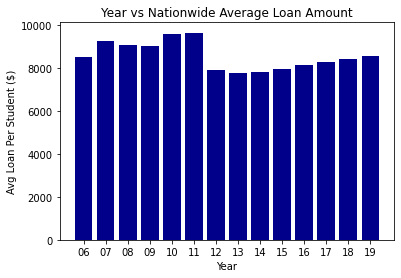

In [167]:
# Year vs Average Loan Amount Nationwide
years = ["06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19"]

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(average_loan_per_person_array.items(), columns=['Year_Quarter', 'Avg Loan Amount'])
x = df["Year_Quarter"]
y = df["Avg Loan Amount"]

plt.bar(x, y, width=0.8, color='darkblue')
plt.xlabel("Year")
plt.ylabel("Avg Loan Per Student ($)")
plt.title("Year vs Nationwide Average Loan Amount")
plt.xticks(np.arange(len(years)), years)
plt.show()


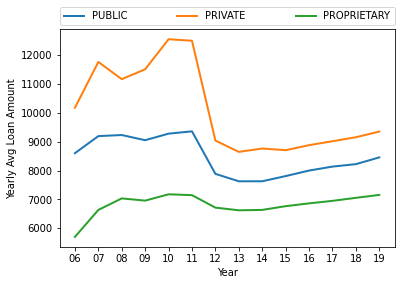

In [168]:
# Year vs Average Loan Amount Per School Type
for school_type in average_loan_school_type_array:
    if school_type.startswith("FOREIGN"):
        continue
    df = pd.DataFrame(average_loan_school_type_array[school_type].items(), columns=['Year', 'Avg Loan Amount'])
    x = df["Year"]
    y = df["Avg Loan Amount"]
    plt.plot(x, y, linewidth=2, label=school_type)

plt.xlabel("Year")
plt.ylabel("Yearly Avg Loan Amount")
plt.xticks(np.arange(len(years)), years)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.) # https://stackoverflow.com/questions/44413020
plt.show()


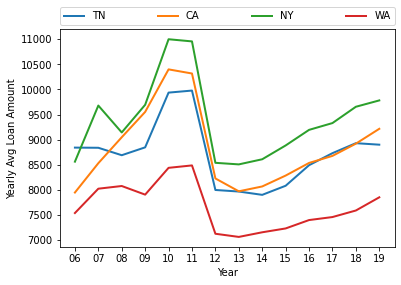

In [169]:
# Year vs Average Loan Amount Per State
state_list = ["TN", "CA", "NY", "WA"]

# for state in average_loan_state_array: # this will graph all states
for state in state_list:
    df = pd.DataFrame(average_loan_state_array[state].items(), columns=['Year_Quarter', 'Avg Loan Amount'])
    x = df["Year_Quarter"]
    y = df["Avg Loan Amount"]    
    plt.plot(x, y, linewidth=2, label=state)

plt.xlabel("Year")
plt.ylabel("Yearly Avg Loan Amount")
plt.xticks(np.arange(len(years)), years)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.) # https://stackoverflow.com/questions/44413020
plt.show()

# todo, consider https://python-graph-gallery.com/124-spaghetti-plot/

# Now looking at school's average loan vs average ACT score:

In [170]:
import xlrd
import matplotlib.pyplot as plt
import numpy as np

quarters = ["Q1", "Q2", "Q3", "Q4"]

colleges = ['CALIFORNIA INSTITUTE OF TECHNOLOGY', 'MASSACHUSETTS INSTITUTE OF TECHNOLOGY', \
           'UNIVERSITY OF CHICAGO (THE)', 'VANDERBILT UNIVERSITY', 'OHIO STATE UNIVERSITY', \
           'UNIVERSITY OF TENNESSEE', 'UNIVERSITY OF ALABAMA AT BIRMINGHAM', \
           'TENNESSEE TECHNOLOGICAL UNIVERSITY', 'JACKSONVILLE UNIVERSITY', 'TENNESSEE STATE UNIVERSITY']
act_scores = [36, 35, 34, 34, 30, 27, 25, 24, 23, 18]


In [171]:
def getData(filename):
    workbook = xlrd.open_workbook(filename)
    worksheet = workbook.sheet_by_index(0)

    data = []
    start_row = 6

    for i in range(start_row, worksheet.nrows):
        school_name = worksheet.cell(i, 1).value
        school_state = worksheet.cell(i, 2).value
        school_type = worksheet.cell(i, 4).value
        school_sub = [worksheet.cell(i, 5).value, worksheet.cell(i, 6).value, worksheet.cell(i, 7).value,\
                      worksheet.cell(i, 8).value, worksheet.cell(i, 9).value]
        school_unsub = [worksheet.cell(i, 10).value, worksheet.cell(i, 11).value,\
                        worksheet.cell(i, 12).value, worksheet.cell(i, 13).value,\
                        worksheet.cell(i, 14).value]
        school_plus = [worksheet.cell(i, 20).value, worksheet.cell(i, 21).value,\
                       worksheet.cell(i, 22).value, worksheet.cell(i, 23).value,\
                       worksheet.cell(i, 24).value]

        row = {}
        row['name'] = school_name
        row['state'] = school_state
        row['type'] = school_type
        row['sub'] = school_sub
        row['unsub'] = school_unsub
        row['plus'] = school_plus
        data.append(row)
    return data

In [172]:
def loan_vs(data, colleges):
    sub_array = []
    unsub_array = []
    plus_array = []
    total_array = []
    for x in colleges:        
        tot_sub_rec = 0
        tot_unsub_rec = 0
        tot_plus_rec = 0
        tot_sub_dis = 0
        tot_unsub_dis = 0
        tot_plus_dis = 0
        
        for q in data:
            for row in q:
                if x == row['name']:
                    if row['sub'][4] != '-' and row['sub'][4] != ' -':
                        tot_sub_rec += row['sub'][3]
                        tot_sub_dis += row['sub'][4]
                    
                    if row['unsub'][4] != '-' and row['unsub'][4] != ' -':
                        tot_unsub_rec += row['unsub'][3]
                        tot_unsub_dis += row['unsub'][4]
                    
                    if row['plus'][4] != '-' and row['plus'][4] != ' -':
                        tot_plus_rec += row['plus'][3]
                        tot_plus_dis += row['plus'][4]
                    # print("found school:", x, "with tot_sub_dis =", tot_sub_dis)
                    break
        
        # these fix div by 0 errors
        if tot_sub_rec == 0:
            sub_per_rec = 0
        else:
            sub_per_rec = tot_sub_dis / tot_sub_rec
            
        if tot_unsub_rec == 0:
            unsub_per_rec = 0
        else:
            unsub_per_rec = tot_unsub_dis / tot_unsub_rec

        if tot_plus_rec == 0:
            plus_per_rec = 0
        else:
            plus_per_rec = tot_plus_dis / tot_plus_rec

        
        total = tot_sub_dis + tot_unsub_dis + tot_plus_dis
        count = tot_sub_rec + tot_unsub_rec + tot_plus_rec
        
        if count == 0:
            average = 0
        else:
            average = total / count
                
        sub_array.append(round(sub_per_rec, 2))
        unsub_array.append(round(unsub_per_rec, 2))
        plus_array.append(round(plus_per_rec,2))
        total_array.append(round(average, 2))


        # print(x)
        # print('Subsidized:', sub_per_rec)
        # print('Unsubsidized:', unsub_per_rec)
        # print('Plus:', plus_per_rec)
        # print(average)
        # print()
        
        
    # return sub_array, unsub_array, plus_array
    return total_array

In [173]:
#Average Loan vs. ACT score of the school
data = []
for quarter in quarters:
    filename = '../data/06-20/17-18/DL_Dashboard_AY2017_2018_' + quarter + '.xls'
    data.append(getData(filename))

loan_data = loan_vs(data, colleges)


In [174]:
for i in range(len(colleges)):
    print(colleges[i], "has an average act score of", act_scores[i], "and an average loan of $" + str(loan_data[i] * 4), "per year")

CALIFORNIA INSTITUTE OF TECHNOLOGY has an average act score of 36 and an average loan of $12602.28 per year
MASSACHUSETTS INSTITUTE OF TECHNOLOGY has an average act score of 35 and an average loan of $16079.84 per year
UNIVERSITY OF CHICAGO (THE) has an average act score of 34 and an average loan of $11175.72 per year
VANDERBILT UNIVERSITY has an average act score of 34 and an average loan of $16453.68 per year
OHIO STATE UNIVERSITY has an average act score of 30 and an average loan of $9923.64 per year
UNIVERSITY OF TENNESSEE has an average act score of 27 and an average loan of $11528.88 per year
UNIVERSITY OF ALABAMA AT BIRMINGHAM has an average act score of 25 and an average loan of $9454.32 per year
TENNESSEE TECHNOLOGICAL UNIVERSITY has an average act score of 24 and an average loan of $8527.96 per year
JACKSONVILLE UNIVERSITY has an average act score of 23 and an average loan of $12029.56 per year
TENNESSEE STATE UNIVERSITY has an average act score of 18 and an average loan of $

[Text(0, 0.5, 'Avg Loan Amount'), Text(0.5, 0, 'Average ACT Score')]

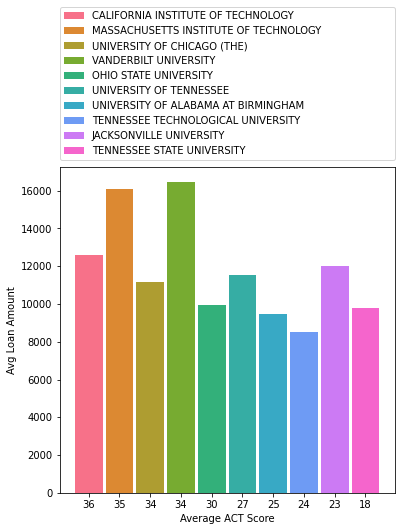

In [175]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

x = act_scores
y = [i*4 for i in loan_data] 

f, ax = plt.subplots(figsize=(6, 6))
colors = sns.color_palette("husl", len(colleges))
xticks = [i for i in range(len(colleges))]

for i in range(len(colleges)):
    plt.bar(xticks[i], y[i], width=0.9, color=colors[i], label=colleges[i])

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, mode="expand", borderaxespad=0.) # https://stackoverflow.com/questions/44413020
plt.xticks(xticks, x)

ax.set(ylabel="Avg Loan Amount", xlabel="Average ACT Score")


# Now experimenting with race/gender info

In [191]:
data = pd.read_excel(r'../data/IPEDS_data.xlsx')

columns_to_keep = ["Name", "Degree of urbanization (Urban-centric locale)", "Percent of total enrollment that are White", "Percent of total enrollment that are women", "Percent of total enrollment that are Asian", "Percent of total enrollment that are Black or African American", "Percent of total enrollment that are Hispanic/Latino"]
df = data[columns_to_keep]
df = df.rename({"Name": "name", "Degree of urbanization (Urban-centric locale)": "urban", "Percent of total enrollment that are White": "white", "Percent of total enrollment that are women": "women", "Percent of total enrollment that are Asian": "asian", "Percent of total enrollment that are Black or African American": "black", "Percent of total enrollment that are Hispanic/Latino": "hispanic"}, axis=1)
df["men"] = 100-df["women"]
df["name"] = df["name"].str.lower()


In [ ]:
def getData(filename):
    workbook = xlrd.open_workbook(filename)
    worksheet = workbook.sheet_by_index(0)

    data = []
    start_row = 6

    for i in range(start_row, worksheet.nrows):
        school_name = worksheet.cell(i, 1).value 
        school_state = worksheet.cell(i, 2).value
        school_type = worksheet.cell(i, 4).value 
        school_sub = [worksheet.cell(i, 5).value, worksheet.cell(i, 6).value, worksheet.cell(i, 7).value,\
                      worksheet.cell(i, 8).value, worksheet.cell(i, 9).value]
        school_unsub = [worksheet.cell(i, 10).value, worksheet.cell(i, 11).value,\
                        worksheet.cell(i, 12).value, worksheet.cell(i, 13).value,\
                        worksheet.cell(i, 14).value]
        school_plus = [worksheet.cell(i, 20).value, worksheet.cell(i, 21).value,\
                       worksheet.cell(i, 22).value, worksheet.cell(i, 23).value,\
                       worksheet.cell(i, 24).value]

        row = {}
        row['name'] = school_name
        row['state'] = school_state
        row['type'] = school_type
        row['sub'] = school_sub
        row['unsub'] = school_unsub
        row['plus'] = school_plus
        data.append(row)
    return data


In [204]:
def loan_vs(data):
    colleges = []
    total = []
    count = []
    avg = []
    index = -1
    
    for q in data:
        for row in q:
            school_name = row['name'].lower()
            
            try:
                index = colleges.index(school_name)
            except:
                # need to insert school and values of 0
                colleges.append(school_name)
                total.append(0)
                count.append(0)
                index = len(colleges)-1 # the last index
                
            # else total 
            if row['sub'][4] != '-' and row['sub'][4] != ' -':
                count[index] += row['sub'][3]
                total[index] += row['sub'][4]

            if row['unsub'][4] != '-' and row['unsub'][4] != ' -':
                count[index] += row['unsub'][3]
                total[index] += row['unsub'][4]

            if row['plus'][4] != '-' and row['plus'][4] != ' -':
                count[index] += row['plus'][3]
                total[index] += row['plus'][4]
        
    for i in range(len(total)):
        if count[i] == 0:
            avg.append(0)
        else:
            avg.append(total[i]/count[i])
        
    return colleges, avg


In [205]:
# Get avg loan per school here
data = []
for quarter in quarters:
    filename = '../data/06-20/12-13/DL_Dashboard_AY2012_2013_' + quarter + '.xls'
    data.append(getData(filename))

colleges, avg = loan_vs(data)
for i in range(len(colleges)):
    print(colleges[i], avg[i])


alaska pacific university 2789.7678812415656
university of alaska fairbanks 2539.6881605351173
university of alaska southeast 2485.832329317269
alaska bible college 2062.3333333333335
university of alaska anchorage 2552.0305159977806
alaska career college 2077.0718728403594
charter college 1595.6626869768081
avtec - alaska's institute of technology 2071.4725274725274
alabama agricultural & mechanical university 2091.3424215587042
faulkner university 1826.3892872570195
university of montevallo 2054.760395010395
alabama state university 1945.607236142014
central alabama community college 1840.688979830459
athens state university 2010.1468253968253
auburn university 2938.9188479683457
birmingham-southern college 2817.6198662846227
calhoun community college 1773.2652398241926
enterprise state community college 1383.518636003172
university of north alabama 2007.0669606696067
huntingdon college 2360.9713663243074
jacksonville state university 2291.8933389544686
jefferson state community coll

lincoln technical institute 1724.557981499244
porter and chester institute of branford 1607.1736211031175
paier college of art 2210.1627296587926
capital community college 2025.094425483504
middlesex community college 1296.689380911436
paul mitchell the school danbury 1875.868493150685
lincoln college of new england 1846.7215694084844
porter and chester institute 1562.3690645126078
asnuntuck community college 1883.1932989690722
stone academy 1729.4359654943596
sanford-brown college 1990.197600033449
branford hall career institute 1481.42625213982
american institute 1619.580457746479
ridley - lowell business & technical institute 1599.3198576150521
north haven academy, llc 2189.6476377952754
butler business school 1114.0723684210527
connecticut institute of hair design 1904.6990291262136
new england tractor trailer training school of connecticut 1368.169011036572
connecticut center for massage therapy 1742.243486973948
lyme academy college of fine arts 2558.6326530612246
industrial mana

michael's school of beauty 1710.054054054054
medtech institute 1728.2208760484623
omnitech institute 2109.9015025041735
augusta school of massage 1262.7724550898204
savannah school of massage therapy training 1195.125
academy of somatic healing arts (asha) 1221.8253968253969
georgia gwinnett college 2051.8882861055513
paul mitchell the school atlanta 2026.7758433079434
lake lanier school of massage 2183.3189964157705
profile institute of barber-styling 2013.2048929663608
process institute of cosmetology (the) 1989.2224622030237
georgia beauty academy 1723.8027397260273
georgia christian university 2850.0
atlanta beauty & barber academy 1808.5333333333333
elaine sterling institute(the) 2258.6962750716334
sae institute of technology - atlanta 2767.981052631579
university of guam 2032.4495436766624
chaminade university of honolulu 2420.2151204388265
brigham young university - hawaii 1691.367041198502
university of hawaii at manoa 3000.6497472194137
university of hawaii at hilo 2234.234907

hebrew college 2562.714285714286
lasell college 2653.238157894737
lesley university 2562.726192587338
university of massachusetts - lowell 2355.463316820005
new england college of optometry (the) 0
mcphs university 2916.505531065458
greenfield community college 1412.9487315010572
massachusetts institute of technology 3635.6821062896147
massachusetts college of art and design 2904.238629014874
fitchburg state university 2163.9421329507413
framingham state university 2075.5551764580446
massachusetts college of liberal arts 2140.446677701584
salem state university 2258.168513332522
mount holyoke college 2978.336510687464
mount ida college 2677.599000908265
new england conservatory of music 2889.5872801082546
nichols college 2839.634139560745
northeastern university 2153.29740144505
pine manor college 2036.8877192982457
regis college 2564.963739886125
simmons college 2577.8795802205623
trustees of the smith college 2815.7306515085265
university of massachusetts - dartmouth 2170.60813289849

central community college 1436.2972436604189
southeast community college 1130.951010338346
xenon international academy ii 2043.2177493138151
creative center (the) 4451.104868913858
myotherapy institute 1477.139534883721
colby-sawyer college 2441.951321279555
dartmouth college 2257.903188405797
franklin pierce university 2249.9879573876797
monadnock community college 0
new england college 2132.6448839208942
southern new hampshire university 1170.743133308173
nhti  - concord's community college 1755.4793908629442
saint anselm college 2628.1646586345382
university of new hampshire 2448.692198697512
keene state college 2311.2087473805177
plymouth state university of the university system of new hampshi 2676.797849632382
mount washington college 851.6877228428809
daniel webster college 3110.9663984855656
lakes region community college 1753.8803172314347
continental academie of hair design 1925.4035714285715
university of new hampshire school of law 0
st. joseph school of nursing 1879.888507

phagans' grants pass college of beauty 878.0964467005076
abdill career college 2161.7722222222224
portland actors conservatory 2331.896551724138
columbia gorge community college 1286.2480938416422
aveda institute portland 1734.4652473387603
baptist bible college of pennsylvania 2256.832925835371
bryn athyn college of the new church 1371.031654676259
albright college 2772.0216632742076
allegheny college 2681.1781037192245
community college of allegheny county 1608.2690308572933
alvernia university 2686.6372824256036
arcadia university 2188.043114321752
bryn mawr college 2748.9194659776053
bucknell university 3212.3934029071934
bucks county community college 1827.270963831077
cabrini college 2458.4492653810835
carnegie mellon university 2685.250511370473
cedar crest college 2260.7153940383832
chatham university 2456.6274209989806
chestnut hill college 2434.053859964093
misericordia  university 2588.680862181581
community college of philadelphia 1620.516695625897
curtis institute of music

skinworks school of advanced skincare 1276.9184782608695
nightingale college 2536.527777777778
renaissance school of therapeutic massage 2045.6206896551723
paul mitchell the school logan 1669.3641304347825
cameo college of essential beauty 1864.1674528301887
aveda institute provo 1582.4348591549297
imageworks academy of hair design 2089.6145833333335
skin science institute of laser & esthetics 1509.5502008032129
renaissance academie 1824.6996996996997
mandalyn academy 1996.5661764705883
acaydia spa and school of aesthetics 1684.8131868131868
taylor andrews academy of hair design 1708.8016949152543
taylor andrews academy-st. george 1566.013201320132
barber school (the) 1727.9539170506912
rocky mountain university of health professions 0
medspa academies 1908.021978021978
averett university 2683.6517127071825
bluefield college 2443.5886446886448
bridgewater college 2586.0388227927365
college of william & mary 2859.060610618138
christopher newport university 2409.4545360611696
richard bla

newcourtland education center 1830.6153846153845
university of puerto rico - humacao university college 1843.2072727272728
university of puerto rico - mayaguez 2832.2025139664806
university of puerto rico - cayey university college 2135.3233082706765
university of puerto rico - arecibo 2201.6814159292035
university of puerto rico, ponce 2284.219457013575
university of puerto rico - utuado 1530.701754385965
university of puerto rico bayamon technical university college 2769.5766423357663
university of puerto rico, aguadilla regional college 2239.4036697247707
huertas college 1780.2067307692307
automeca technical college 1021.1
seminario evangelico de puerto rico 3089.6666666666665
university of puerto rico carolina regional college 1485.5450236966824
community college of rhode island 1340.3613809714973
spartanburg community college 1568.4232534421214
avera mckennan hospital 2250.0
tennessee school of beauty 1827.9050632911392
north central institute 1956.3775510204082
sae institute of t